In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
import matplotlib.pyplot as plot
# we can use the LabelEncoder to encode the gender feature
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing two different imputation methods that take into consideration all the features when predicting the missing values
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier

# oversample the minority class using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


    CountryKey  sr_year   country_name  average_age  suicide_rate  \
0            1     2005  United States           31         0.119   
1            2     2006  United States           40         0.121   
2            3     2007  United States           34         0.124   
3            4     2008  United States           30         0.127   
4            5     2009  United States           38         0.128   
5            6     2010  United States           31         0.131   
6            7     2011  United States           36         0.134   
7            8     2012  United States           30         0.135   
8            9     2013  United States           29         0.135   
9           10     2014  United States           36         0.140   
10          11     2015  United States           27         0.144   
11          12     2016  United States           28         0.151   
12          13     2017  United States           28         0.159   
13          14     2018  United St

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


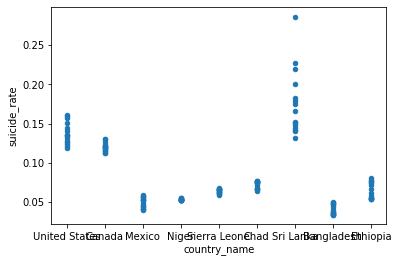

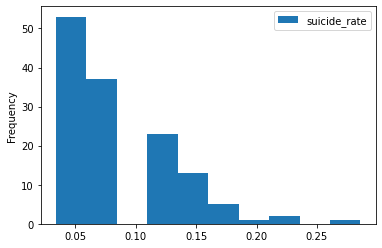

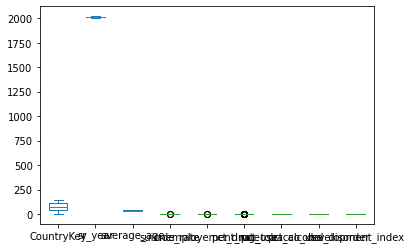

In [ ]:
#load the datasets
SR_main = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/SR_fact_table.csv')
country_demo = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/country_demographics.csv')
crime_rate = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/crime_rate.csv')
employment = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/employement.csv')
sub_abuse = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/substance_abuse.csv')
disease = pd.read_csv('/content/drive/MyDrive/DataScience_Project-main/disease.csv')
#merge data frames
data_frames = [SR_main, country_demo, crime_rate,employment,sub_abuse]



df_merge = pd.merge(SR_main, country_demo, how='left', left_on=['CountryKey'], right_on=['country_key'])
df_merge = pd.merge(df_merge, crime_rate, how='left', left_on=['CountryKey'], right_on=['crime_key'])
df_merge = pd.merge(df_merge, employment, how='left', left_on=['CountryKey'], right_on=['employement_key'])
df_merge = pd.merge(df_merge, sub_abuse, how='left', left_on=['CountryKey'], right_on=['substance_key'])
df_merge = pd.merge(df_merge, disease, how='left', left_on=['CountryKey'], right_on=['disease_key'])


df = df_merge[['CountryKey','sr_year','country_name','average_age','suicide_rate','unemployement_rate','pct_drug_use','pct_tobacco_use','pct_alcohol_disorder','development_index']]
# df.fillna(0,inplace=True)
#,'pct_drug_use','pct_tobacco_use','pct_alcohol_disorder']]

print(df.head(20))

#scatter plot

df.plot(kind = 'scatter', x = 'country_name', y = 'suicide_rate')
df.plot(kind='hist', x = 'country_name', y = 'suicide_rate')
df.plot(kind = 'box')

#description
print(df.describe())

In [ ]:
# separate the features and the labels to be used in model development (2)
data = df.drop(["country_name"], axis=1) 
labels = df[["development_index"]].copy()


incomplete_rows = data.isnull()
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
print(incomplete_rows.sum())
print(sample_incomplete_rows)

# data imputation
# given the task in predicting individuals with hepatitis C infection, select two of the most appropriate imputation strategies to fill the missing values and briefly explain why you have selected the particular strategies in a markdown cell below the current cell (3)
imputer_simple = SimpleImputer(strategy='median')
imputer_knn = KNNImputer(n_neighbors=5)
imputer_iter = IterativeImputer(max_iter=10)

# print the rows before and after being imputed with the two selected strategies (5)
missing_data =["suicide_rate"]
missing_indexes = sample_incomplete_rows = data[data.isnull().any(axis=1)].index
#Median
train_median = data
train_median[missing_data] = imputer_simple.fit_transform(train_median[missing_data])
print("Median imputed data: \n",train_median.loc[train_median.index.isin(missing_indexes)])


#KNN
train_knn = data
train_knn[missing_data] = imputer_knn.fit_transform(train_knn[missing_data])
print("KNN imputed data: \n",train_knn.loc[train_knn.index.isin(missing_indexes)])

# check for missing values in the training dataset and print how many rows can be identified with the missing values (1)

data = train_knn
data = df.drop(["country_name"], axis=1) 
labels = df[["development_index"]].copy()
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

CountryKey              0
sr_year                 0
average_age             0
suicide_rate            9
unemployement_rate      0
pct_drug_use            0
pct_tobacco_use         0
pct_alcohol_disorder    0
development_index       0
dtype: int64
    CountryKey  sr_year  average_age  suicide_rate  unemployement_rate  \
15          16     2020           31           NaN             0.08050   
31          32     2020           36           NaN             0.09460   
47          48     2020           38           NaN             0.04450   
63          64     2020           31           NaN             0.00624   
79          80     2020           38           NaN             0.05195   

    pct_drug_use  pct_tobacco_use  pct_alcohol_disorder  development_index  
15        0.0370            0.251                0.0249                  2  
31        0.0272            0.175                0.0197                  2  
47        0.0058            0.139                0.0139                  2  


In [ ]:
num_pipeline  = Pipeline([('imputer',KNNImputer(n_neighbors=5)),('scaler',StandardScaler())])
num_features = list(X_train)

full_pipeline = ColumnTransformer([("num",num_pipeline,num_features)])

prepared_data = full_pipeline.fit_transform(X_train)
print(prepared_data)

[[ 0.903916    1.60929844 -1.18753798  1.33119016  0.96273312 -0.27524944
   0.34821969 -0.57556108 -1.2023737 ]
 [-0.75111644  0.50927166  1.56568067 -0.61440182  0.23370918 -0.32412635
  -0.32939701  0.11026296  1.2477463 ]
 [ 1.07181784 -0.37074977 -1.64640776 -0.97139117 -0.01689282 -0.5294094
   2.17402025 -0.23888383 -1.2023737 ]
 [ 1.28769164  1.60929844 -0.49923332 -1.08295034  0.74653673 -0.50985863
   1.87285727 -0.21394477 -1.2023737 ]
 [ 0.54412634 -1.69078191 -1.18753798  4.51732014  1.79590353 -0.26547406
   0.59291461 -0.37604864 -1.2023737 ]
 [-0.31936885  0.94928237  0.877376   -0.68133732 -1.51818006 -0.57828631
  -1.01642505 -1.08681173  0.0226863 ]
 [-1.75852749 -1.69078191 -0.49923332  0.79124376  0.59171203  1.93398711
   0.93172296  1.53178915  1.2477463 ]
 [ 0.25629461 -0.81076048 -1.64640776 -0.16816512 -1.32430059 -0.59783708
  -0.58350327 -1.03693362  0.0226863 ]
 [-1.08692012  0.94928237  1.33624578  1.03667394  1.17753501  1.86555943
  -0.00941134  0.845965

In [ ]:
dtc_parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
    "min_samples_leaf": [10,20,30]
}    

# parameters for RandomForestClassifier: 
    # n_estimators -> 100, 200
    # max_depth -> 3, 5
    # bootstrap -> True, False
rtc_parameters = {
    "n_estimators": [100,200,300], 
    "max_depth": [3, 5, 7],
}

gbc_parameters = {
    "n_estimators": [100,200,300], 
    "max_depth": [3, 5, 7],
}

scoring = {"accuracy": "accuracy", "bal_accuracy": "balanced_accuracy", "F1_macro": "f1_macro"}

##Decision Tree
model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    dtc_parameters, 
    cv=5,
    scoring=scoring,
    refit='bal_accuracy'
)

## Random Tree
model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    rtc_parameters, 
    cv=5,
    scoring=scoring,
    refit='bal_accuracy'
)
#Gradient Boost


model_gradient_boost = GradientBoostingClassifier(
    random_state=42,
    
)

model_gradient_boost = GridSearchCV(
    model_gradient_boost, 
    gbc_parameters, 
    cv=5,
    scoring=scoring,
    refit='bal_accuracy'
)



# fit the training data (0.5)

model_desicion_tree.fit(prepared_data,y_train)
model_random_forest.fit(prepared_data,y_train)
model_gradient_boost.fit(prepared_data,y_train)


print(f'Best parameters (DTC) {model_desicion_tree.best_params_}')
print(f'Best parameters (RTC) {model_random_forest.best_params_}')
print(f'Best parameters (RTC) {model_gradient_boost.best_params_}')


print(
    f'Mean cross-validated accuracy score of the best_estimator (DTC): ' + 
    f'{model_desicion_tree.best_score_:.3f}'
)
print(
    f'Mean cross-validated accuracy score of the best_estimator (RTC): ' + 
    f'{model_random_forest.best_score_:.3f}'
)
print(
    f'Mean cross-validated accuracy score of the best_estimator (RTC): ' + 
    f'{model_gradient_boost.best_score_:.3f}'
)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters (DTC) {'max_depth': 3, 'min_samples_leaf': 10}
Best parameters (RTC) {'max_depth': 3, 'n_estimators': 100}
Best parameters (RTC) {'max_depth': 3, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator (DTC): 1.000
Mean cross-validated accuracy score of the best_estimator (RTC): 1.000
Mean cross-validated accuracy score of the best_estimator (RTC): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# transform test data for prediction (2)
prepared_test_data = full_pipeline.fit_transform(X_test)
print(prepared_test_data)
# obtain predictions on test data using the best model from GridSearchCV (i.e., .best_estimator_) (2)

prediction_DTC = model_desicion_tree.best_estimator_.predict(prepared_test_data)
prediction_RTC = model_random_forest.best_estimator_.predict(prepared_test_data)
prediction_GBC = model_gradient_boost.best_estimator_.predict(prepared_test_data)


# generate the classification report and the confusion matrix for test predictions (3)


print(f"DTC Classification report:\n {classification_report(y_test, prediction_DTC)}")
print(f"DTC confusion matrix:\n {confusion_matrix(y_test,prediction_DTC)}")

print(f"RTC Classification report:\n {classification_report(y_test, prediction_RTC)}")
print(f"RTC confusion matrix:\n {confusion_matrix(y_test,prediction_RTC)}")

print(f"GBC Classification report:\n {classification_report(y_test, prediction_GBC)}")
print(f"GBC confusion matrix:\n {confusion_matrix(y_test,prediction_GBC)}")


[[ 1.25124212e+00 -4.08944366e-01  1.46152335e+00 -1.00645508e+00
  -5.26910718e-01 -6.82007954e-01  1.95934914e+00 -2.27361766e-01
  -1.29578924e+00]
 [-1.15572745e+00 -8.29572858e-01 -6.94822579e-01  4.35690444e-01
   8.01732309e-01  1.04081349e+00  1.42044086e-01  7.81400891e-01
   1.15939038e+00]
 [ 3.91610129e-01 -1.03988710e+00 -6.94822579e-01 -3.36162091e-01
  -1.70872920e+00 -7.40267616e-01 -9.30939216e-01 -1.07012551e+00
  -6.81994339e-02]
 [ 7.60023839e-01 -1.25020135e+00 -4.79187985e-02  1.81690024e+00
   9.75033634e-01 -4.57292113e-01  2.19376216e-01 -3.93360685e-01
  -1.29578924e+00]
 [-2.46973635e-01  2.21998370e-01 -6.94822579e-01 -7.83024085e-01
  -1.49499096e+00 -7.23621999e-01 -1.44326458e+00 -1.10843295e+00
  -6.81994339e-02]
 [-1.32765385e+00  1.06325535e+00 -9.10457172e-01  1.32941443e+00
  -5.51461311e-02  2.05619618e+00  1.80710151e-01  1.47093486e+00
   1.15939038e+00]
 [ 1.61965583e+00 -6.19258612e-01 -6.94822579e-01 -3.97097818e-01
  -1.00830315e+00 -6.9033076